Random Forest for Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

In [2]:
data= pd.read_csv("data/diabetes.csv", sep = ",")
test_data= pd.read_csv("data/test/clean_test 80percent.csv", sep = ",")
train_data= pd.read_csv("data/train/clean_train 80percent.csv", sep = ",")

In [3]:
train_data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9.0,123.0,94.0,33.1,0.374,40.0,0
1,0.0,95.0,92.0,36.5,0.330,26.0,0
2,7.0,150.0,342.0,34.7,0.718,42.0,0
3,2.0,100.0,90.0,32.9,0.867,28.0,1
4,1.0,80.0,60.0,30.0,0.527,22.0,0


In [4]:
test_data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,97.0,140.0,23.2,0.487,22.0,0
1,5.0,136.0,88.0,35.0,0.286,35.0,1
2,1.0,139.0,83.0,28.7,0.654,22.0,0
3,2.0,107.0,100.0,33.6,0.404,23.0,0
4,2.0,90.0,55.0,24.4,0.249,24.0,0


In [5]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 60, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=42)

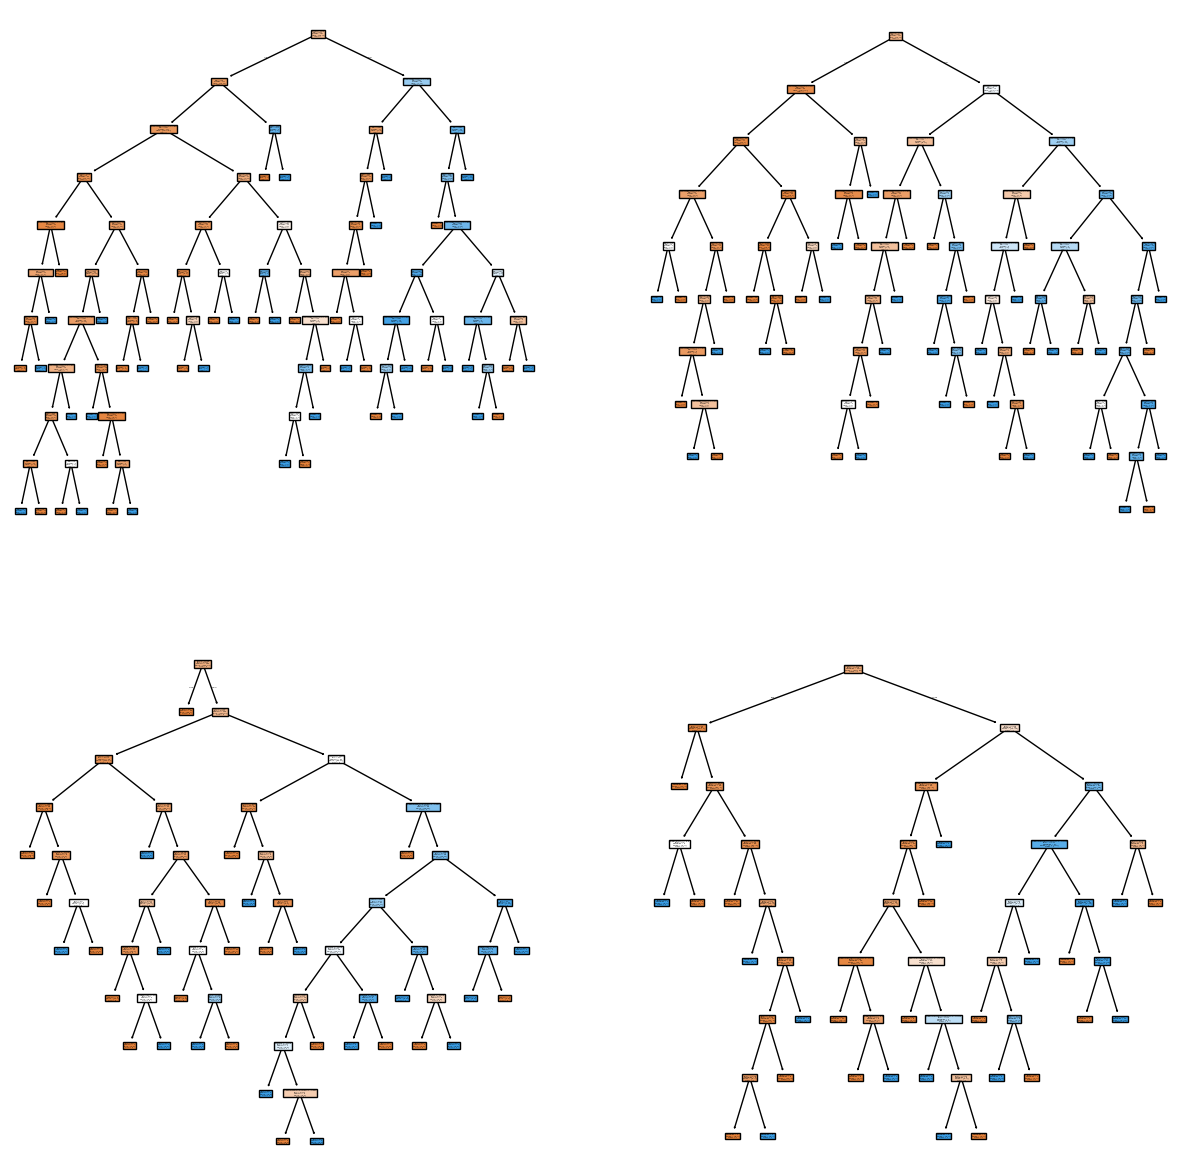

In [7]:
fig, axis = plt.subplots(2, 2, figsize = (15, 15))
# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [8]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [9]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.98      0.89        44
           1       0.92      0.55      0.69        22

    accuracy                           0.83        66
   macro avg       0.87      0.76      0.79        66
weighted avg       0.85      0.83      0.82        66



In [10]:
from pickle import dump
dump(model, open("models/random_forest_classifier_default_42.sav", "wb"))

Random Forest Regression Not Applicable